# Pizza hut project 

# 1. Introduction 
COMPANY BRIEF

+ Pizza Hut is the first international pizza brand to enter Vietnam in 2006. With a dynamic positioning strategy targeting young customers, Pizza Hut has become the market leader in revenue and number of stores with 130 stores.

+ During the 2019-2023 period, Covid had a strong impact on consumer behavior in the F&B industry. Customers are now not only looking for quality products but also demanding more culinary experiences. To maintain its leading position, Pizza Hut has implemented many innovative campaigns to adapt to changes in consumer behavior.


In this project,i am going to cover several question below:
1. First: Retail metrics 
+ Which Months generate the highest Order and Revenue?
+ Which Day of a week generate the highest Order and Revenue?
+ Which orderform the most Order are made?
+ Which Date contributes the highest revenue?
+ How does each channel contributes to the revenue? is there any patterns?
+ Which provinces account for the highest part of revenue?
+ How does the voucher influence the business performance?
+ Churn Rate 
+ Corhort Base Retention
2. Second: Customer Segmentation using RFM Analysis 
+ Calculate RFMScore and Generate Clusters
+ Define K Value for clustering
+ Cluster Exploration: 
+ -  How many Customer for each group/cluster? 
+ - How does each cluster/group contribute to the company's revenue? 
+ - What is the common order form  in each group 
+ - When does each cluster usually made an order? 
+ - How does each cluster react on a voucer?
3. Third : Customer prediction analysis for at least in the next 6 months
+ Calculate customer life time value 
+ Predcit the churn rate for each group 


# 2. Data cleaning 

In [1]:
# Import Libraries 
from datetime import datetime
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.offline as pyoff
import plotly.graph_objs as go 


## 2.1 Loading data 

In [2]:
path=r'D:\study_da\Home work lv3\ven_demo\venv\Include\Pizza hut\Data set.xlsx'
df = pd.read_excel(path)

df.head()


,Unnamed: 0,BillID,Channel,OrderFrom,TransactionDate,SalesAmount,CustomerID,CustomerGender,VoucherStatus,Province
0,0,0,Take Away,CALL CENTER,2021-10-01 00:00:00+00:00,296891,1753863,Unknown,No,Ho Chi Minh City
1,1,1,Take Away,STORE,2021-10-01 00:00:00+00:00,301782,1124050,Unknown,No,Hanoi
2,2,2,Take Away,WEBSITE,2021-10-01 00:00:00+00:00,319792,1626827,Male,No,Hanoi
3,3,3,Take Away,STORE,2021-10-01 00:00:00+00:00,424762,125643,Male,No,Hanoi
4,4,4,Delivery,STORE,2021-10-01 00:00:00+00:00,280031,2117237,Unknown,No,Hanoi


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   Unnamed: 0       1048575 non-null  int64 
 1   BillID           1048575 non-null  int64 
 2   Channel          1048575 non-null  object
 3   OrderFrom        1048575 non-null  object
 4   TransactionDate  1048575 non-null  object
 5   SalesAmount      1048575 non-null  int64 
 6   CustomerID       1048575 non-null  int64 
 7   CustomerGender   1048575 non-null  object
 8   VoucherStatus    1048575 non-null  object
 9   Province         1048575 non-null  object
dtypes: int64(4), object(6)
memory usage: 80.0+ MB


Data Description
+ Bill_ID :	The unique ID of the order
+ Channel : The channel through which the order was consumed
+ OrderFrom	: Platform where customer can place their order 
+ TransactionDate : 	The date of the order
+ SalesAmount: 	The amount customer paid for the order
+ CustomerID:	The unique ID of the customer
+ CustomerGender:	The gender of the customer
+ VoucherStatus:	Whether a voucher was used for the order
+ Province:	The general location of where the order was made


## 2.2 Data cleaning
Data cleaning is the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data 

In [4]:
# 1.Convert Data 
df['TransactionDate']=pd.to_datetime(df['TransactionDate'])

In [5]:
# 2. Handling Missing Values
df.isnull().sum()


Unnamed: 0         0
BillID             0
Channel            0
OrderFrom          0
TransactionDate    0
SalesAmount        0
CustomerID         0
CustomerGender     0
VoucherStatus      0
Province           0
dtype: int64

data has no mising value 

In [6]:
# 3. Adding Neccesary Features
# In this project, i'm going to define which feature can affect to customer behavior. Therefore,
#I am going to need several features like Months, Days, and hours. In conclusion, to complete this project i am going to add these features on my datasets :
def extract_date_features(data):
    data["day"] = data.TransactionDate.dt.day
    data["month"] = data.TransactionDate.dt.month
    data['year'] = data.TransactionDate.dt.year
    data['day_of_week'] = data.TransactionDate.dt.day_of_week.astype(int)
    data["is_month_start"] = data.TransactionDate.dt.is_month_start.astype(int)
    data["is_month_end"] = data.TransactionDate.dt.is_month_end.astype(int)
    data['is_weekend'] = np.where(data['day_of_week'].isin([5,6]),1,0)
extract_date_features(df)


In [7]:
df.columns

Index(['Unnamed: 0', 'BillID', 'Channel', 'OrderFrom', 'TransactionDate',
       'SalesAmount', 'CustomerID', 'CustomerGender', 'VoucherStatus',
       'Province', 'day', 'month', 'year', 'day_of_week', 'is_month_start',
       'is_month_end', 'is_weekend'],
      dtype='object')

In [8]:
#rearrange dataset
df = df[['BillID', 'Channel', 'OrderFrom', 'TransactionDate','day', 'month','year', 'day_of_week', 'is_month_start',
       'is_month_end', 'is_weekend','SalesAmount', 'CustomerID', 'CustomerGender', 'VoucherStatus',
       'Province']]

df.head()

,BillID,Channel,OrderFrom,TransactionDate,day,month,year,day_of_week,is_month_start,is_month_end,is_weekend,SalesAmount,CustomerID,CustomerGender,VoucherStatus,Province
0,0,Take Away,CALL CENTER,2021-10-01 00:00:00+00:00,1,10,2021,4,1,0,0,296891,1753863,Unknown,No,Ho Chi Minh City
1,1,Take Away,STORE,2021-10-01 00:00:00+00:00,1,10,2021,4,1,0,0,301782,1124050,Unknown,No,Hanoi
2,2,Take Away,WEBSITE,2021-10-01 00:00:00+00:00,1,10,2021,4,1,0,0,319792,1626827,Male,No,Hanoi
3,3,Take Away,STORE,2021-10-01 00:00:00+00:00,1,10,2021,4,1,0,0,424762,125643,Male,No,Hanoi
4,4,Delivery,STORE,2021-10-01 00:00:00+00:00,1,10,2021,4,1,0,0,280031,2117237,Unknown,No,Hanoi


# 3. EDA (Retail Metrics)

## 3.1. Which Months generate the highest Order and Revenue 

In [9]:
print("This dataset contain information from {} to {}".format(df['TransactionDate'].unique()[0], df['TransactionDate'].unique()[-1]))

This dataset contain information from 2021-10-01 00:00:00+00:00 to 2023-01-09 00:00:00+00:00


In [10]:
df

,BillID,Channel,OrderFrom,TransactionDate,day,month,year,day_of_week,is_month_start,is_month_end,is_weekend,SalesAmount,CustomerID,CustomerGender,VoucherStatus,Province
0,0,Take Away,CALL CENTER,2021-10-01 00:00:00+00:00,1,10,2021,4,1,0,0,296891,1753863,Unknown,No,Ho Chi Minh City
1,1,Take Away,STORE,2021-10-01 00:00:00+00:00,1,10,2021,4,1,0,0,301782,1124050,Unknown,No,Hanoi
2,2,Take Away,WEBSITE,2021-10-01 00:00:00+00:00,1,10,2021,4,1,0,0,319792,1626827,Male,No,Hanoi
3,3,Take Away,STORE,2021-10-01 00:00:00+00:00,1,10,2021,4,1,0,0,424762,125643,Male,No,Hanoi
4,4,Delivery,STORE,2021-10-01 00:00:00+00:00,1,10,2021,4,1,0,0,280031,2117237,Unknown,No,Hanoi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,Delivery,STORE,2023-01-09 00:00:00+00:00,9,1,2023,0,0,0,0,178107,1398136,Unknown,No,Southern Provinces
1048571,1048571,Take Away,STORE,2023-01-09 00:00:00+00:00,9,1,2023,0,0,0,0,331447,2023258,Unknown,No,Hanoi
1048572,1048572,Take Away,WEBSITE,2023-01-09 00:00:00+00:00,9,1,2023,0,0,0,0,381509,2041510,Female,Yes,Southern Provinces
1048573,1048573,Take Away,STORE,2023-01-09 00:00:00+00:00,9,1,2023,0,0,0,0,508205,1927215,Unknown,Yes,Hanoi


The data collected in January is incomplete, so we should exclude the data for that month in our analysis.

In [11]:

df['month_year'] = df['year'] * 100 + df['month']
df = df[df['month_year'] < 202301]
ord_rev_month = df.groupby('month_year').agg({'BillID': lambda x: x.nunique(), 'SalesAmount': 'sum'}).reset_index(names='month_year')



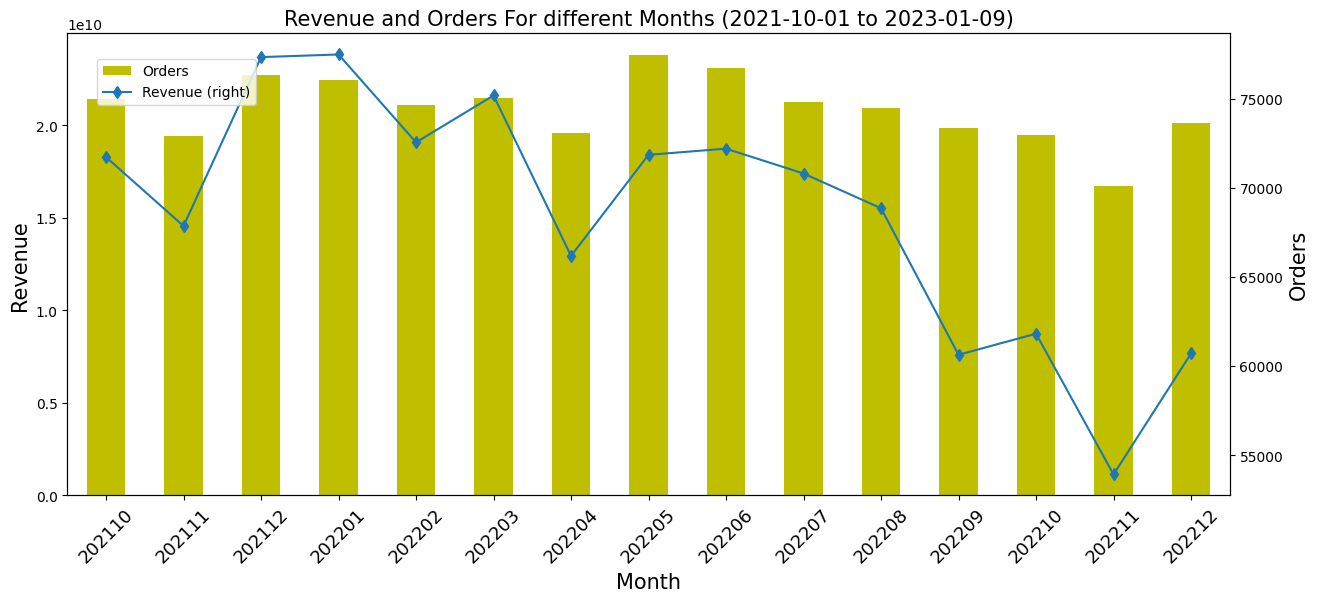

In [12]:
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1 = ord_rev_month['SalesAmount'].plot(kind='bar', color='y', label='Orders')
ax2 = ord_rev_month['BillID'].plot(kind='line', marker='d', secondary_y=True, label = 'Revenue')
ax1.set_xlabel('Month',fontsize=15)
ax1.set_ylabel('Revenue',fontsize=15)
ax2.set_ylabel('Orders',fontsize=15)
ax1.set_title('Revenue and Orders For different Months (2021-10-01 to 2023-01-09)',fontsize=15)
ax1.set_xticks(range(len(ord_rev_month)))
ax1.set_xticklabels(ord_rev_month['month_year'], rotation= 45, fontsize=13)
fig.legend(loc="upper left", bbox_to_anchor=(0.02,0.96), bbox_transform=ax1.transAxes)
plt.show()

The chart shows a decline in revenue and order volume in 2022 compared to the same months in 2021. Over a 12-month period, revenue peaked at around 23 billion in May and June, coinciding with the summer break for students and 31st Southeast Asian Games event, while other months saw relatively stable revenue at approximately 20 billion.

## 3.2.  Which Day of Month generate the highest Order and Revenue?

In [13]:
ord_rev_day = df.groupby(['day']).agg({'BillID':lambda x: x.nunique(),'SalesAmount':'sum'}).reset_index(names='Day of Month')
ord_rev_day

,Day of Month,BillID,SalesAmount
0,1,36440,11048796891
1,2,36515,10929817514
2,3,34766,10184362724
3,4,32584,9588993587
4,5,33096,9708382855
5,6,31951,9527035859
6,7,30803,9193067572
7,8,32919,10150627183
8,9,33048,10266773170
9,10,34218,10489812484


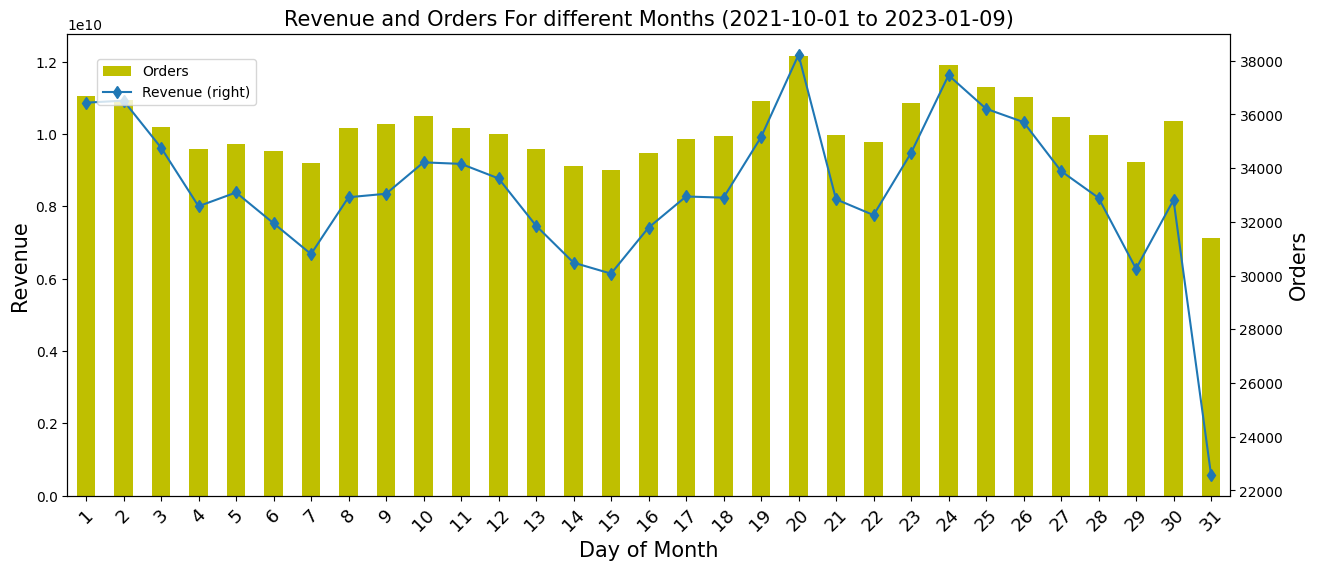

In [14]:
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1 = ord_rev_day['SalesAmount'].plot(kind='bar', color='y', label='Orders')
ax2 = ord_rev_day['BillID'].plot(kind='line', marker='d', secondary_y=True, label = 'Revenue')
ax1.set_xlabel('Day of Month',fontsize=15)
ax1.set_ylabel('Revenue',fontsize=15)
ax2.set_ylabel('Orders',fontsize=15)
ax1.set_title('Revenue and Orders For different Months (2021-10-01 to 2023-01-09)',fontsize=15)
ax1.set_xticks(range(len(ord_rev_day)))
ax1.set_xticklabels(ord_rev_day['Day of Month'], rotation= 45, fontsize=13)
fig.legend(loc="upper left", bbox_to_anchor=(0.02,0.96), bbox_transform=ax1.transAxes)
plt.show()

## 3.3 Which Day of Week generate the highest Order and Revenue?


In [15]:
ord_rev_dow = df.groupby(['day_of_week']).agg({'BillID':lambda x: x.nunique(),'SalesAmount':'sum'}).reset_index(names='Day of Month')
ord_rev_dow

,Day of Month,BillID,SalesAmount
0,0,122546,36045819536
1,1,113679,33493631214
2,2,120398,36029121889
3,3,129194,40510755838
4,4,154080,48710039115
5,5,197419,60952471883
6,6,191751,57538419381


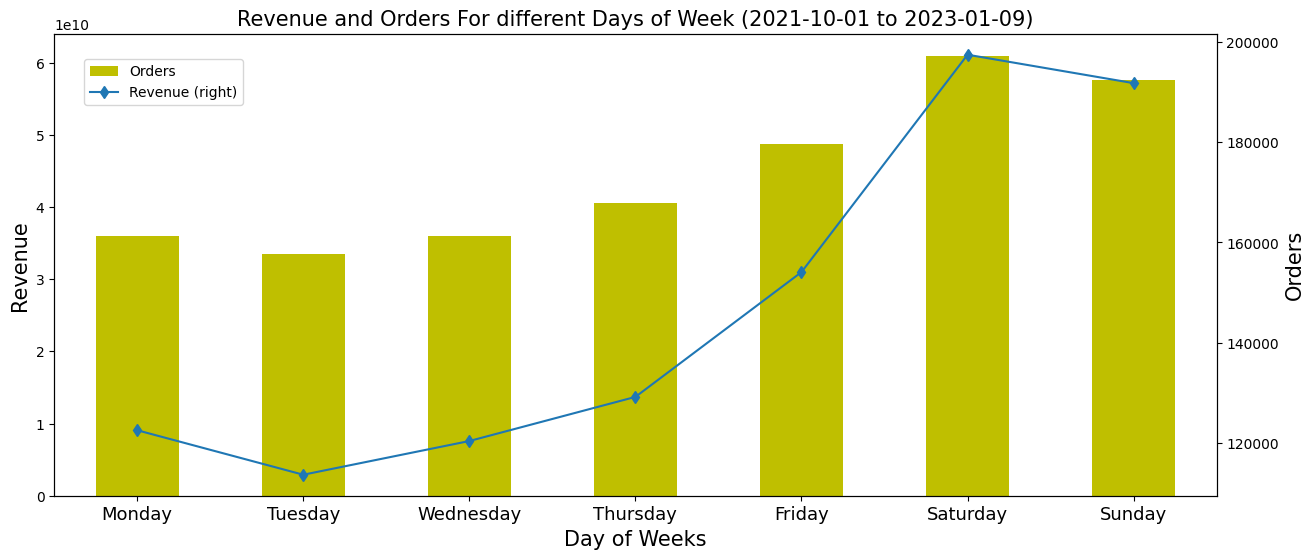

In [16]:
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1 = ord_rev_dow['SalesAmount'].plot(kind='bar', color='y', label='Orders')
ax2 = ord_rev_dow['BillID'].plot(kind='line', marker='d', secondary_y=True, label = 'Revenue')
ax1.set_xlabel('Day of Weeks',fontsize=15)
ax1.set_ylabel('Revenue',fontsize=15)
ax2.set_ylabel('Orders',fontsize=15)
ax1.set_title('Revenue and Orders For different Days of Week (2021-10-01 to 2023-01-09)',fontsize=15)
ax1.set_xticklabels(('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'), 
                    rotation='horizontal', fontsize=13)
fig.legend(loc="upper left", bbox_to_anchor=(0.02,0.96), bbox_transform=ax1.transAxes)
plt.show()

The significant spike in revenue and orders on Saturday  and Sunday can be attributed to the weekend effect, where people have more free time for shopping and leisure activities

## 3.4 How does each Area contributes to the revenue? is there any patterns?

In [17]:
print("Number of Country that the sales cover : ", df['Province'].nunique())
print("List of country : ")
n = 1
for i in df['Province'].unique():
    print("{}. {}".format(n, i))
    n += 1

Number of Country that the sales cover :  4
List of country : 
1. Ho Chi Minh City
2. Hanoi
3. Nothern Provinces
4. Southern Provinces


In [18]:
country_perform=df.groupby('Province').agg({'CustomerID':lambda x: x.nunique(),'BillID':lambda x: x.nunique(),'SalesAmount':'sum'}).reset_index(names='Province')
country_perform

,Province,CustomerID,BillID,SalesAmount
0,Hanoi,171893,315569,101917796908
1,Ho Chi Minh City,165168,298683,97742862769
2,Nothern Provinces,102757,159876,42827175456
3,Southern Provinces,142192,254939,70792423723


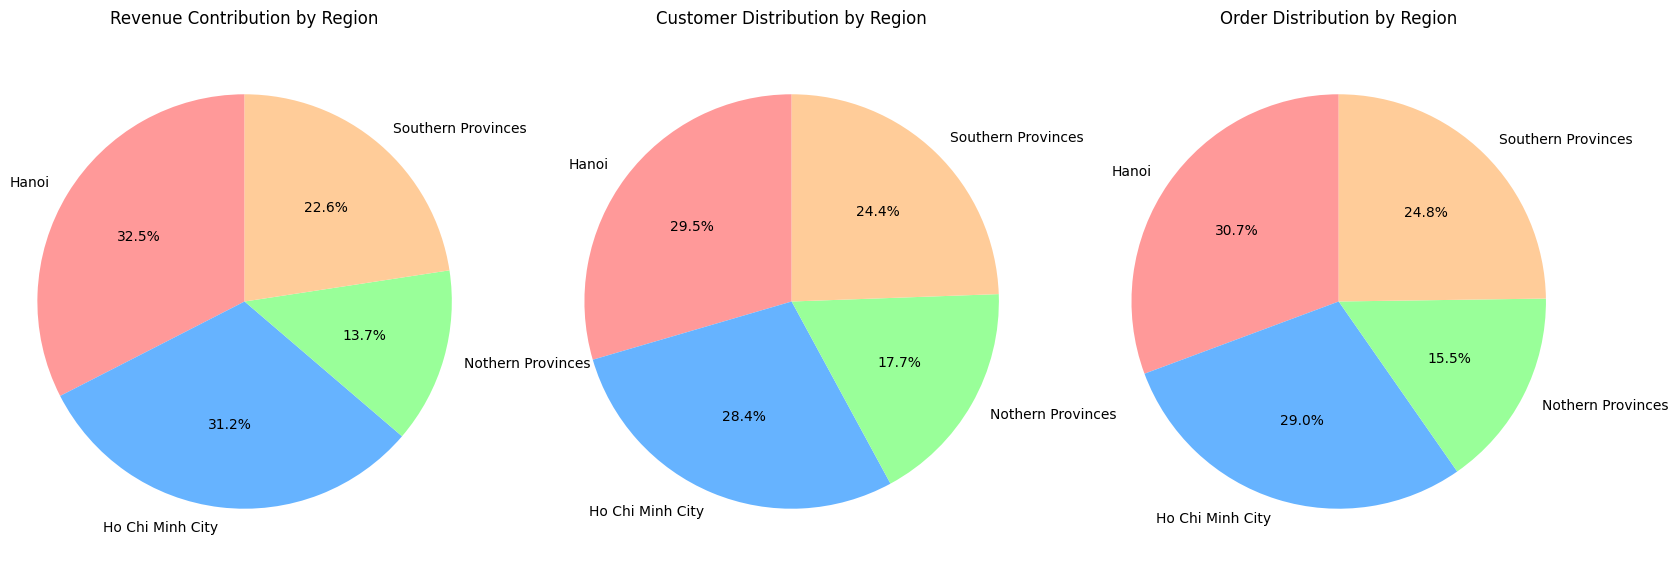

In [19]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 7))

# Plot pie chart for SalesAmount
axs[0].pie(country_perform['SalesAmount'], labels=country_perform['Province'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
axs[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axs[0].set_title('Revenue Contribution by Region')

# Plot pie chart for CustomerID
axs[1].pie(country_perform['CustomerID'], labels=country_perform['Province'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
axs[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axs[1].set_title('Customer Distribution by Region')

# Plot pie chart for BillID
axs[2].pie(country_perform['BillID'], labels=country_perform['Province'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
axs[2].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axs[2].set_title('Order Distribution by Region')
plt.show()

+ Hanoi has the highest sales amount among all regions (32,5%), indicating a strong market presence and high customer engagement.Ho Chi Minh City follows closely behind Hanoi in terms of sales amount, with a slightly lower number of customers and bill => The company may have better market penetration and brand presence in the major cities compared to the provinces.
+ The provinces, especially the Northern Provinces, might have a more rural demographic with lower purchasing power and fewer retail opportunities, leading to lower sales amounts.

## 3.5 How does distribution of customer in each channel? Is there any trending?


In [20]:
df['Channel'].value_counts()

Channel
Take Away    514686
Delivery     491636
Dine In       22745
Name: count, dtype: int64

In [21]:
df.columns

Index(['BillID', 'Channel', 'OrderFrom', 'TransactionDate', 'day', 'month',
       'year', 'day_of_week', 'is_month_start', 'is_month_end', 'is_weekend',
       'SalesAmount', 'CustomerID', 'CustomerGender', 'VoucherStatus',
       'Province', 'month_year'],
      dtype='object')

In [22]:
Channel_df=pd.crosstab(df['Channel'],df['OrderFrom'], margins=True, normalize='columns')

In [23]:
Channel_df

OrderFrom,APP,CALL CENTER,STORE,WEBSITE,All
Channel,,,,,
Delivery,0.710507,0.809637,0.234044,0.661505,0.477749
Dine In,0.000000,0.000000,0.043833,0.000000,0.022103
Take Away,0.289493,0.190363,0.722123,0.338495,0.500148


The data highlights the importance of different channels for various order types, with the call center and stores playing crucial roles in delivery and take-away orders, respectively.
+ Delivery is the most preferred order type across all channels, with the call center leading in this category (47,7%)
+ Dine In orders are exclusively placed in stores, though they represent a small fraction of total orders.
+ Take Away orders are most commonly placed in stores, with a significant percentage also coming from the APP and website.

In [24]:
channel_df=df.groupby(['month_year','Channel']).agg({'BillID':lambda x: x.nunique(),'SalesAmount':'sum'}).reset_index()


In [25]:
pivot_df = channel_df.pivot_table(index='month_year', columns='Channel', values='SalesAmount', aggfunc='sum', fill_value=0)
pivot_df['Total_revenue_per_month'] = pivot_df.sum(axis=1)
percentage_df = pivot_df.div(pivot_df['Total_revenue_per_month'], axis=0) * 100
percentage_df.drop(columns=['Total_revenue_per_month'], inplace=True)


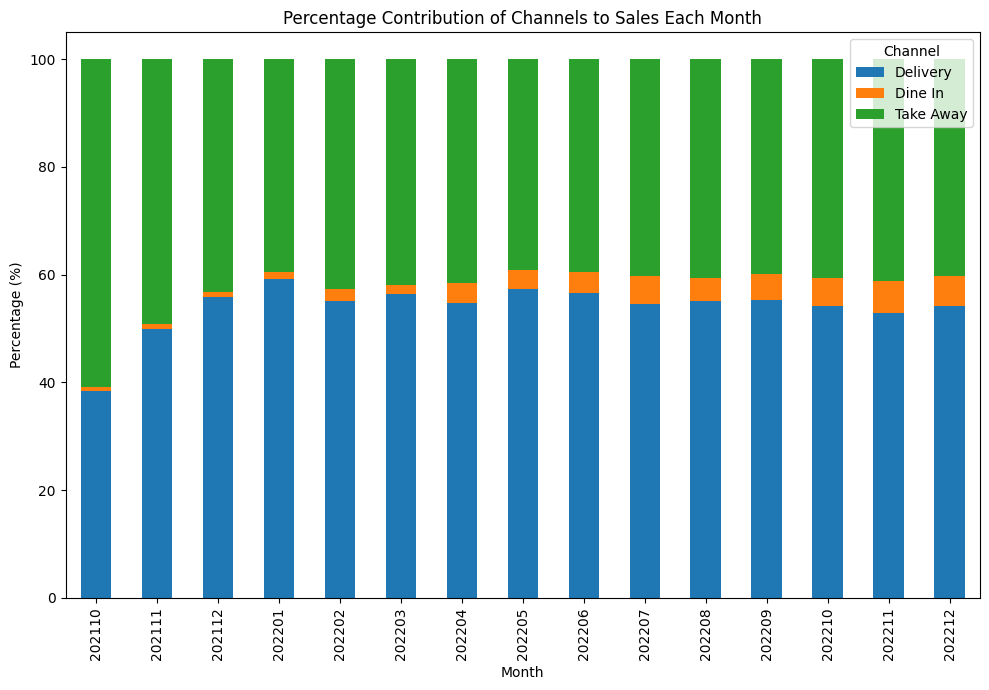

In [26]:
# Create 100% stacked columns 
ax = percentage_df.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Percentage Contribution of Channels to Sales Each Month')
plt.xlabel('Month')
plt.ylabel('Percentage (%)')   
plt.legend(title='Channel')
plt.tight_layout()
plt.show()



From the chart, it can be observed that over time, following the relaxation of restrictions, there is a trend in the percentage of customers visiting the store. Delivery has become the primary channel contributing to revenue.

In [27]:
pivot_od_df = df.pivot_table(index='month_year', columns='OrderFrom', values='SalesAmount', aggfunc='sum', fill_value=0)
pivot_od_df['Total_revenue_per_month'] = pivot_od_df.sum(axis=1)
percentage_od_df = pivot_od_df.div(pivot_od_df['Total_revenue_per_month'], axis=0) * 100
percentage_od_df.drop(columns=['Total_revenue_per_month'], inplace=True)

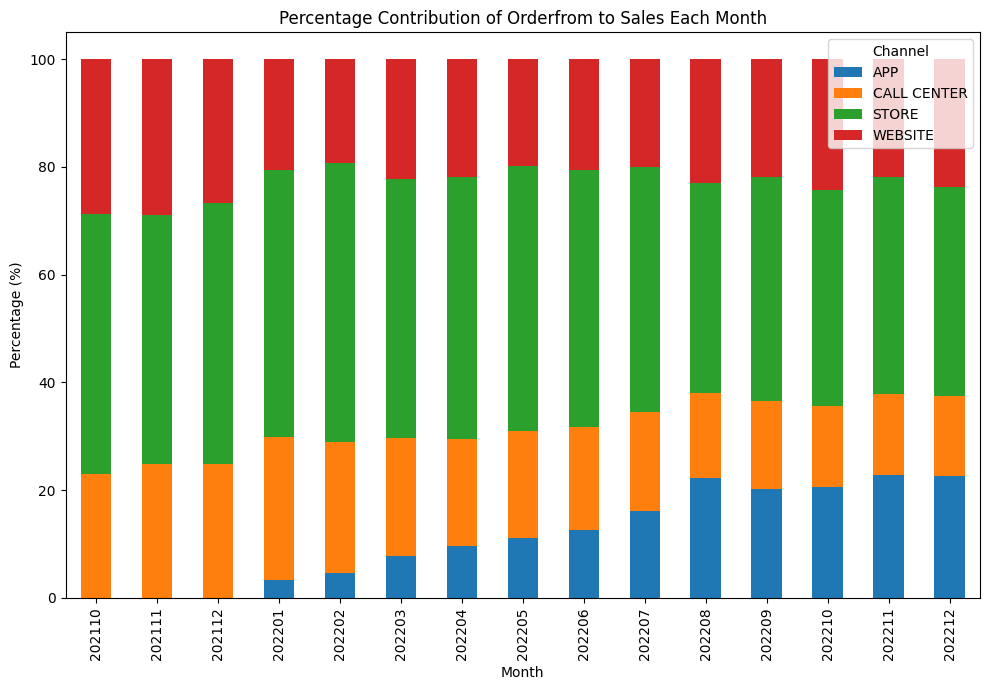

In [28]:
# Create 100% stacked columns 
ax = percentage_od_df.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Percentage Contribution of Orderfrom to Sales Each Month')
plt.xlabel('Month')
plt.ylabel('Percentage (%)')   
plt.legend(title='Channel')
plt.tight_layout()
plt.show()



Most customers still place their orders through the Store. Over time, customers have been shifting from ordering via the Call Center to using the App. This shift may be due to the App's more user-friendly and attractive design, or it could offer more promotions and incentives.

In [29]:
df.columns

Index(['BillID', 'Channel', 'OrderFrom', 'TransactionDate', 'day', 'month',
       'year', 'day_of_week', 'is_month_start', 'is_month_end', 'is_weekend',
       'SalesAmount', 'CustomerID', 'CustomerGender', 'VoucherStatus',
       'Province', 'month_year'],
      dtype='object')

In [30]:
pd.crosstab(df['VoucherStatus'],df['OrderFrom'], margins=True, normalize='columns')

OrderFrom,APP,CALL CENTER,STORE,WEBSITE,All
VoucherStatus,,,,,
No,0.569424,0.996378,0.984754,0.823434,0.910108
Yes,0.430576,0.003622,0.015246,0.176566,0.089892


It can be observed that the ordering method attracts more customers when there is a high voucher code rate of 43%.

## 3.6 How does the Discounts influence the business performance?

In [31]:
df=pd.get_dummies(df, columns=["VoucherStatus"], drop_first= True)


In [32]:
df['VoucherStatus_Yes'].astype('int')

0          0
1          0
2          0
3          0
4          0
          ..
1029062    0
1029063    0
1029064    0
1029065    0
1029066    0
Name: VoucherStatus_Yes, Length: 1029067, dtype: int32

In [33]:
disc_rev=df.groupby(['month_year']).agg({'SalesAmount':'sum','VoucherStatus_Yes':'sum'}).reset_index(names='month_year')
disc_rev

,month_year,SalesAmount,VoucherStatus_Yes
0,202110,21418928390,2921
1,202111,19426368400,2825
2,202112,22684585961,1967
3,202201,22439776663,4374
4,202202,21066812565,2818
5,202203,21451990180,3114
6,202204,19595097938,3461
7,202205,23764017408,4516
8,202206,23071676794,3744
9,202207,21249482143,7299


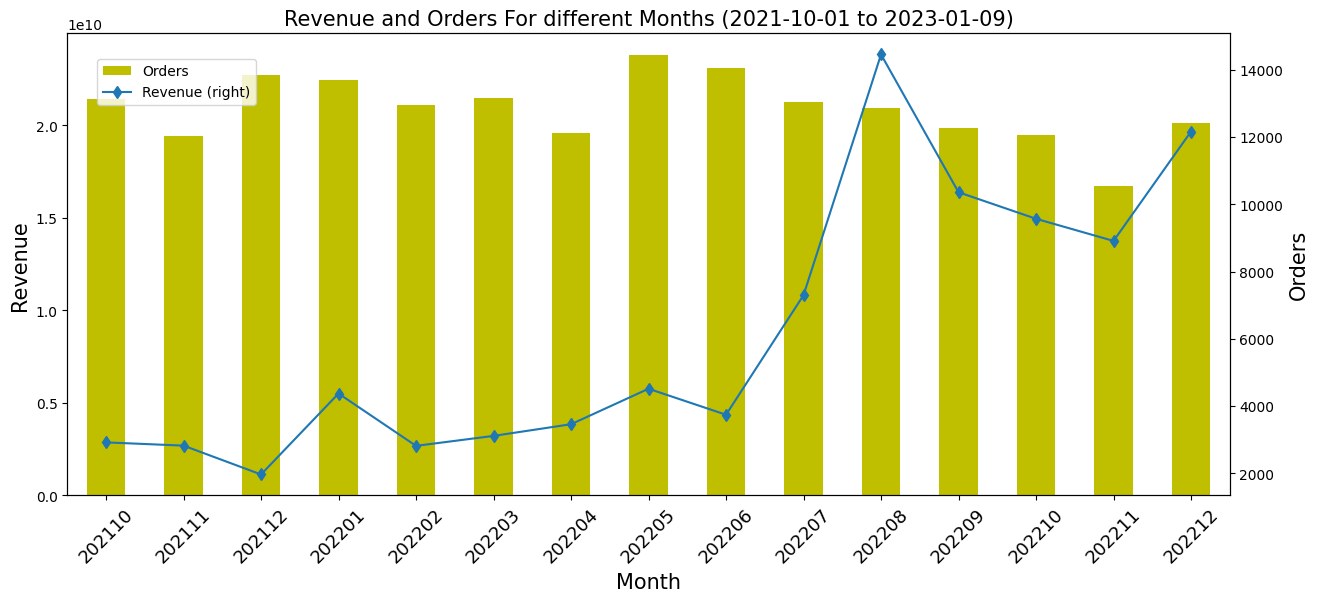

In [34]:
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1 = disc_rev['SalesAmount'].plot(kind='bar', color='y', label='Orders')
ax2 = disc_rev['VoucherStatus_Yes'].plot(kind='line', marker='d', secondary_y=True, label = 'Revenue')
ax1.set_xlabel('Month',fontsize=15)
ax1.set_ylabel('Revenue',fontsize=15)
ax2.set_ylabel('Orders',fontsize=15)
ax1.set_title('Revenue and Orders For different Months (2021-10-01 to 2023-01-09)',fontsize=15)
ax1.set_xticks(range(len(ord_rev_month)))
ax1.set_xticklabels(ord_rev_month['month_year'], rotation= 45, fontsize=13)
fig.legend(loc="upper left", bbox_to_anchor=(0.02,0.96), bbox_transform=ax1.transAxes)
plt.show()

The number of orders using vouchers began to increase significantly in August (14,457 orders), coinciding with the rise in the percentage of customers using the app. However, the use of vouchers has not significantly impacted revenue, as there is no substantial difference in revenue between July and August. This lack of impact could be due to the promotions not being compelling enough or the possibility of additional fees associated with ordering through the app.

## 3.7 Is there any different between each gender? 

In [35]:
gender_perform=df.groupby('CustomerGender').agg({'CustomerID':lambda x: x.nunique(),'BillID':lambda x: x.nunique(),'SalesAmount':'sum'}).reset_index(names='Gender')
gender_perform

,Gender,CustomerID,BillID,SalesAmount
0,Female,54955,140122,48175613766
1,Male,102771,266259,90484264705
2,Unknown,418010,622686,174620380385



Most customers do not provide information about their gender, making it challenging to analyze the impact of gender on shopping behavior. However, among the customers who have provided gender information, the number of male customers is nearly twice that of female customers

## 3.8 Retention rate

In [36]:
df_user_purchased=df.groupby(['month_year','CustomerID'])['SalesAmount'].sum().astype('int').reset_index()
df_user_purchased

,month_year,CustomerID,SalesAmount
0,202110,28,312321
1,202110,59,143911
2,202110,82,318092
3,202110,127,150541
4,202110,175,331718
...,...,...,...
910894,202212,2173870,475264
910895,202212,2173932,255634
910896,202212,2173981,595585
910897,202212,2174072,337963


In [37]:
df_retetion=pd.crosstab(df_user_purchased['CustomerID'],df_user_purchased['month_year']).reset_index()

In [38]:
months=df_retetion.columns[2:]
retention_array=[]
for i in range(len(months)-1):
    retention_data={}
    selected_month=months[i+1]
    prev_month=months[i]
    retention_data['YearMonth']=selected_month
    retention_data['Totalcustomer']=df_retetion[selected_month].sum()
    retention_data['Rentention_cust']=df_retetion[(df_retetion[selected_month]==1) & (df_retetion[prev_month]==1)][selected_month].sum()
    retention_array.append(retention_data)
retention_array
df_retetion_month=pd.DataFrame(retention_array)

In [39]:

df_retetion_month['Rentention_rate']=df_retetion_month['Rentention_cust']/df_retetion_month['Totalcustomer']
df_retetion_month['Churn_rate']=1-df_retetion_month['Rentention_rate']
df_retetion_month

,YearMonth,Totalcustomer,Rentention_cust,Rentention_rate,Churn_rate
0,202112,68127,9886,0.145111,0.854889
1,202201,68655,11042,0.160833,0.839167
2,202202,65683,9993,0.152140,0.847860
3,202203,66749,9782,0.146549,0.853451
4,202204,59047,9627,0.163040,0.836960
5,202205,63617,9425,0.148152,0.851848
6,202206,64031,9733,0.152004,0.847996
7,202207,62045,9817,0.158224,0.841776
8,202208,60363,9773,0.161904,0.838096
9,202209,53583,9275,0.173096,0.826904


In [40]:
print(f"Average of Retention rate per month is : {df_retetion_month['Rentention_rate'].mean() * 100:.2f}%")
print(f"Average of Churn rate per month is : {df_retetion_month['Churn_rate'].mean() * 100:.2f}%")

Average of Retention rate per month is : 15.83%
Average of Churn rate per month is : 84.17%


These figures highlight a significant challenge in retaining customers, and addressing this issue should be a priority for improving overall business stability and growth.

## 3.9 Cohort Base Retention

In [41]:
df.columns

Index(['BillID', 'Channel', 'OrderFrom', 'TransactionDate', 'day', 'month',
       'year', 'day_of_week', 'is_month_start', 'is_month_end', 'is_weekend',
       'SalesAmount', 'CustomerID', 'CustomerGender', 'Province', 'month_year',
       'VoucherStatus_Yes'],
      dtype='object')

In [42]:
df_min_purchased=df.groupby('CustomerID')['month_year'].min().reset_index()
df_min_purchased

,CustomerID,month_year
0,0,202112
1,1,202203
2,8,202207
3,16,202209
4,18,202201
...,...,...
575731,2174059,202112
575732,2174065,202204
575733,2174072,202209
575734,2174075,202212


In [43]:
df_user_purchased

,month_year,CustomerID,SalesAmount
0,202110,28,312321
1,202110,59,143911
2,202110,82,318092
3,202110,127,150541
4,202110,175,331718
...,...,...,...
910894,202212,2173870,475264
910895,202212,2173932,255634
910896,202212,2173981,595585
910897,202212,2174072,337963


In [44]:
customer_retention_df=test=pd.merge(df_user_purchased, df_min_purchased, on='CustomerID', how='right')
customer_retention_df

,month_year_x,CustomerID,SalesAmount,month_year_y
0,202112,0,411663,202112
1,202203,1,105503,202203
2,202207,8,1098496,202207
3,202209,16,286558,202209
4,202201,18,287492,202201
...,...,...,...,...
910894,202209,2174072,330512,202209
910895,202210,2174072,285143,202209
910896,202212,2174072,337963,202209
910897,202212,2174075,262489,202212


In [45]:
cohort_df=pd.crosstab(customer_retention_df['month_year_y'],test['month_year_x']).reset_index()
cohort_df.rename(columns={'month_year_y':'First Month'},inplace=True)
cohort_df

month_year_x,First Month,202110,202111,202112,202201,202202,202203,202204,202205,202206,202207,202208,202209,202210,202211,202212
0,202110,64247,9324,9196,8666,7601,7718,6624,6942,6401,6119,6294,5638,5688,4804,5132
1,202111,0,51021,6384,5722,4757,5129,4399,4521,4147,4007,4073,3618,3595,3113,3193
2,202112,0,0,52547,5642,4579,4668,3883,3922,3650,3477,3490,3167,2974,2541,2992
3,202201,0,0,0,48625,4036,3816,3122,3241,3006,2984,3160,2544,2438,2078,2465
4,202202,0,0,0,0,44710,3450,2568,2676,2406,2281,2448,1948,1959,1628,1801
5,202203,0,0,0,0,0,41968,2934,2662,2538,2331,2356,1979,1989,1680,1782
6,202204,0,0,0,0,0,0,35517,2472,2212,1897,1981,1630,1629,1370,1499
7,202205,0,0,0,0,0,0,0,37181,2539,2207,2145,1733,1678,1361,1553
8,202206,0,0,0,0,0,0,0,0,37132,2640,2051,1648,1583,1373,1442
9,202207,0,0,0,0,0,0,0,0,0,34102,2142,1692,1528,1312,1379


In [46]:
# Loop for row 
for index, row in cohort_df.iterrows():
    first_month_value = row[row['First Month']]
    if first_month_value != 0:
        # Loop for column 
        for column in cohort_df.columns[1:]:
            # Tính tỷ lệ phần trăm và cập nhật DataFrame mới
            cohort_df.at[index, column] = (row[column] / first_month_value) * 100
    else:
        # If first month is 0 => NAN
        cohort_df.iloc[index, 1:] = np.nan


C:\Users\eplus001\AppData\Local\Temp\ipykernel_13464\3493449954.py:8: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '14.512739894469782' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

C:\Users\eplus001\AppData\Local\Temp\ipykernel_13464\3493449954.py:8: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '14.313508801967407' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

C:\Users\eplus001\AppData\Local\Temp\ipykernel_13464\3493449954.py:8: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '13.488567559574765' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

C:\Users\eplus001\AppData\Local\Temp\ipykernel_13464\3493449954.py:8: FutureWarning:

Setting an item of inco

In [47]:
cohort_df

month_year_x,First Month,202110,202111,202112,202201,202202,202203,202204,202205,202206,202207,202208,202209,202210,202211,202212
0,202110,100,14.51274,14.313509,13.488568,11.830903,12.013012,10.310209,10.805174,9.963111,9.524180,9.796566,8.775507,8.853332,7.477392,7.987922
1,202111,0,100.00000,12.512495,11.214990,9.323612,10.052723,8.621940,8.861057,8.128026,7.853629,7.982987,7.091198,7.046118,6.101409,6.258207
2,202112,0,0.00000,100.000000,10.737054,8.714104,8.883476,7.389575,7.463794,6.946162,6.616933,6.641673,6.026985,5.659695,4.835671,5.693950
3,202201,0,0.00000,0.000000,100.000000,8.300257,7.847815,6.420566,6.665296,6.182005,6.136761,6.498715,5.231877,5.013882,4.273522,5.069409
4,202202,0,0.00000,0.000000,0.000000,100.000000,7.716395,5.743682,5.985238,5.381346,5.101767,5.475285,4.356967,4.381570,3.641244,4.028182
5,202203,0,0.00000,0.000000,0.000000,0.000000,100.000000,6.991041,6.342928,6.047465,5.554232,5.613801,4.715498,4.739325,4.003050,4.246092
6,202204,0,0.00000,0.000000,0.000000,0.000000,0.000000,100.000000,6.960047,6.228003,5.341104,5.577611,4.589352,4.586536,3.857308,4.220514
7,202205,0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,6.828757,5.935827,5.769076,4.660983,4.513058,3.660472,4.176865
8,202206,0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,7.109771,5.523538,4.438220,4.263169,3.697619,3.883443
9,202207,0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,6.281157,4.961586,4.480676,3.847282,4.043751


Customers who started buying in 2021 have a higher retention rate than those who started in 2022. This is due to The ongoing effects of the COVID-19 pandemic could have influenced customer behavior differently in 2022 compared to 2021. Changing priorities, financial constraints, or shifting consumer habits could have affected retention rates.

# 4. RFM Segmentation

## 4.1 Section 01 : Data Preparation
In this section, i am going to prepare an RFM datasets that is ready for analysis either using using K-Means Clustering. To give a comprehensive understanding of this project, here are some explanation of each calculation:

+ Recency : last date available in Dataset - last date of purchase each customer
+ Frequency : calculate frequency of purchases, count each particular InvoiceNo
+ Monetary : Total Sale Amount 
Now, let's try to code and get the RFM Datasets

In [48]:
from datetime import datetime,timedelta,date
from __future__ import division
import plotly.offline as pyoff
from sklearn.cluster import KMeans
import plotly.graph_objs as go 
from yellowbrick.cluster import KElbowVisualizer

In [49]:
df

,BillID,Channel,OrderFrom,TransactionDate,day,month,year,day_of_week,is_month_start,is_month_end,is_weekend,SalesAmount,CustomerID,CustomerGender,Province,month_year,VoucherStatus_Yes
0,0,Take Away,CALL CENTER,2021-10-01 00:00:00+00:00,1,10,2021,4,1,0,0,296891,1753863,Unknown,Ho Chi Minh City,202110,False
1,1,Take Away,STORE,2021-10-01 00:00:00+00:00,1,10,2021,4,1,0,0,301782,1124050,Unknown,Hanoi,202110,False
2,2,Take Away,WEBSITE,2021-10-01 00:00:00+00:00,1,10,2021,4,1,0,0,319792,1626827,Male,Hanoi,202110,False
3,3,Take Away,STORE,2021-10-01 00:00:00+00:00,1,10,2021,4,1,0,0,424762,125643,Male,Hanoi,202110,False
4,4,Delivery,STORE,2021-10-01 00:00:00+00:00,1,10,2021,4,1,0,0,280031,2117237,Unknown,Hanoi,202110,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029062,1029062,Delivery,WEBSITE,2022-12-31 00:00:00+00:00,31,12,2022,5,0,1,1,248627,224643,Male,Hanoi,202212,False
1029063,1029063,Take Away,CALL CENTER,2022-12-31 00:00:00+00:00,31,12,2022,5,0,1,1,405030,556434,Male,Hanoi,202212,False
1029064,1029064,Delivery,WEBSITE,2022-12-31 00:00:00+00:00,31,12,2022,5,0,1,1,115461,90116,Unknown,Nothern Provinces,202212,False
1029065,1029065,Take Away,STORE,2022-12-31 00:00:00+00:00,31,12,2022,5,0,1,1,207674,1445947,Unknown,Hanoi,202212,False


In [50]:
df['TransactionDate'] = df['TransactionDate'].dt.tz_localize(None)


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1029067 entries, 0 to 1029066
Data columns (total 17 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   BillID             1029067 non-null  int64         
 1   Channel            1029067 non-null  object        
 2   OrderFrom          1029067 non-null  object        
 3   TransactionDate    1029067 non-null  datetime64[ns]
 4   day                1029067 non-null  int32         
 5   month              1029067 non-null  int32         
 6   year               1029067 non-null  int32         
 7   day_of_week        1029067 non-null  int32         
 8   is_month_start     1029067 non-null  int32         
 9   is_month_end       1029067 non-null  int32         
 10  is_weekend         1029067 non-null  int32         
 11  SalesAmount        1029067 non-null  int64         
 12  CustomerID         1029067 non-null  int64         
 13  CustomerGender     1029067 non-n

In [52]:
# Checking duplicate
df.duplicated().sum()


0

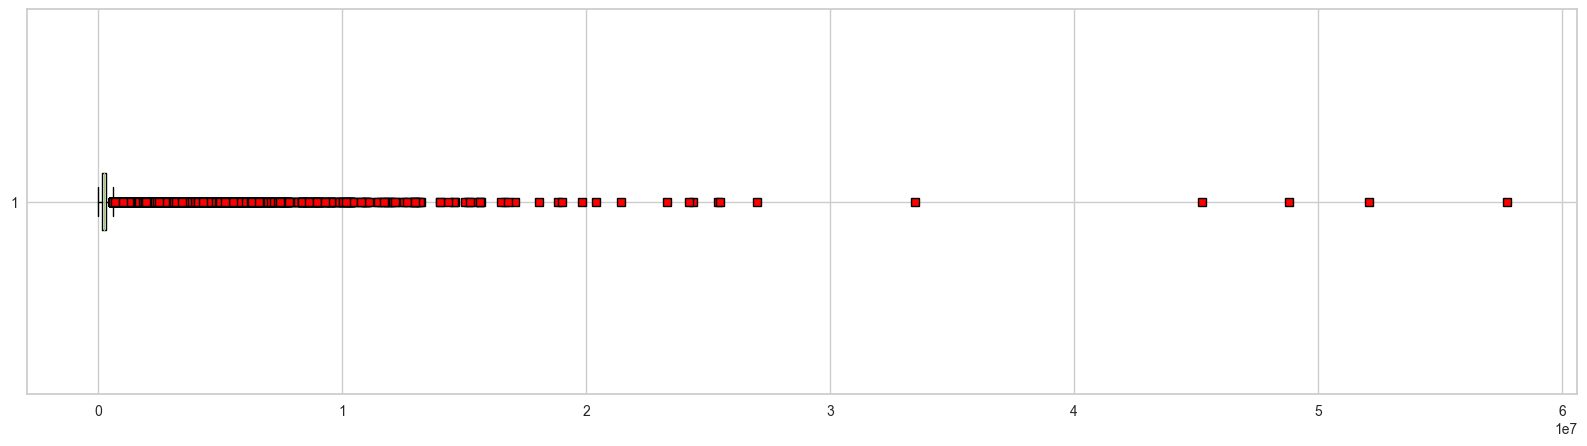

In [53]:
# Checking numberic data distribution

f, ax = plt.subplots(1,1, figsize = (20,5))

ax.boxplot(df[["SalesAmount"]],flierprops = dict(marker = "s", markerfacecolor = "red"), vert = 0)
plt.show()

In [54]:
#defining funcation to remove outliers w.r.t its thresholds
def outlier_thresholds(df,col):
    quartile1=df[col].quantile(0.01)
    quartile3=df[col].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return up_limit, low_limit
def replace_with_threshold(dataframe, variable):
    up_limit, low_limit = outlier_thresholds(dataframe, variable)
    # dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [55]:
# Applying the functions for remove the outlier.
replace_with_threshold(df, "SalesAmount")

C:\Users\eplus001\AppData\Local\Temp\ipykernel_13464\3552796729.py:12: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2934988.2999999793' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



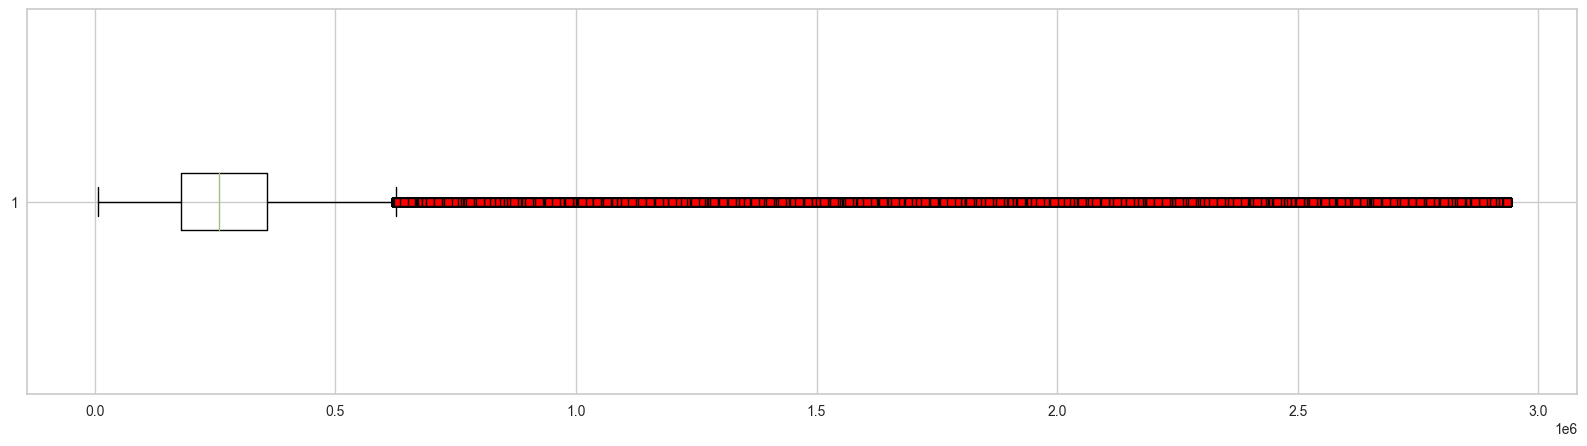

In [56]:
# Checking numberic data distribution
f, ax = plt.subplots(1,1, figsize = (20,5))

ax.boxplot(df[["SalesAmount"]],flierprops = dict(marker = "s", markerfacecolor = "red"), vert = 0)
plt.show()

## 4.2 Section 02 : Feature Engineering

In [57]:
#RFM Featuring
import datetime as dt
#Set Latest date 2023-01-01
Latest_Date = dt.datetime(2023,1,1)

def create_rfm(df,latest_date):
    #Creating RFM features with subset of customerID
    RFM = df.groupby('CustomerID').agg({'TransactionDate': lambda x: (x.max()-latest_date).days, 
                                                    'BillID': lambda x: x.nunique(), 
                                                    "SalesAmount": lambda x: x.sum()}).reset_index()
                                    
    RFM['TransactionDate'] = RFM['TransactionDate'].astype(int)

    #Renaming column names to Recency, Frequency and Monetary
    RFM.rename(columns={'TransactionDate': 'Recency', 
                            'BillID': 'Frequency', 
                            'SalesAmount': 'Monetary'}, inplace=True)
    return RFM





In [58]:
rfm_df=create_rfm(df,Latest_Date)
rfm_df


,CustomerID,Recency,Frequency,Monetary
0,0,-373,1,411663.0
1,1,-300,1,105503.0
2,8,-174,1,1098496.0
3,16,-107,1,286558.0
4,18,-337,1,287492.0
...,...,...,...,...
575731,2174059,-371,1,201270.0
575732,2174065,-246,1,138943.0
575733,2174072,-28,3,953618.0
575734,2174075,-22,1,262489.0


In [59]:
def find_optimal_k_and_cluster(df, metric_name):
    """
    Find the optimal number of clusters, apply K-Means clustering for a given metric,
    and re-label clusters based on the mean value of the metric.
    
    Parameters:
    df (pd.DataFrame): DataFrame with the metric to cluster.
    metric_name (str): Name of the metric column to cluster.
    
    Returns:
    pd.DataFrame: DataFrame with an added column for clusters sorted by mean value.
    """
    # Extract data for the given metric
    metric_data = df[[metric_name]]
    
    # Find the optimal number of clusters using Elbow Method
    plt.figure(figsize=(10, 5))
    ax = plt.axes()
    ax.set_facecolor("#cd5c5c")
    elbow = KElbowVisualizer(KMeans(), k=(1, 10))
    elbow.fit(metric_data)
    elbow.show()
     # Apply K-Means with the optimal number of clusters
    optimal_k = elbow.elbow_value_
    kmeans = KMeans(n_clusters=optimal_k, random_state=0)
    df[f'{metric_name}_Cluster'] = kmeans.fit_predict(metric_data)
    
    # Get cluster centers and sort them by the mean value of the metric
    centroids = kmeans.cluster_centers_
    mean_values = np.mean(centroids, axis=1)
    sorted_indices = np.argsort(mean_values)
    
    # Create a mapping from the original labels to the new sorted labels
    label_map = {old_label: new_label for new_label, old_label in enumerate(sorted_indices)}
    
    # Apply the new sorted labels to the dataframe
    df[f'{metric_name}_Cluster'] = df[f'{metric_name}_Cluster'].map(label_map)
    
    return df



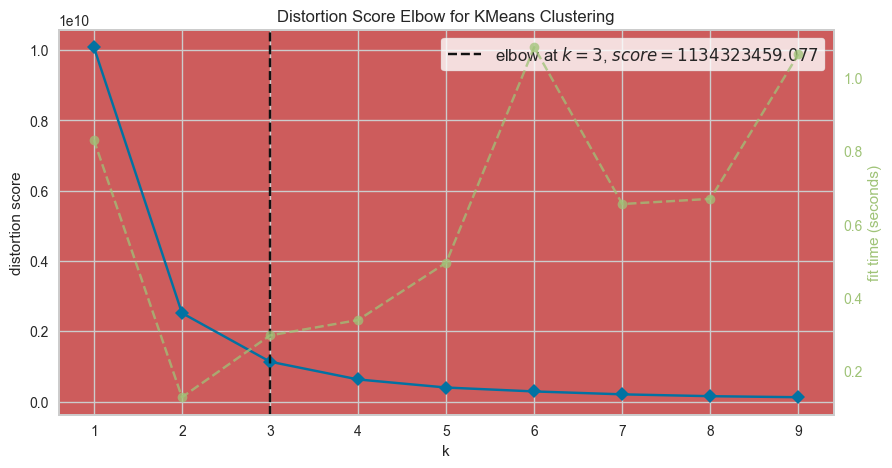

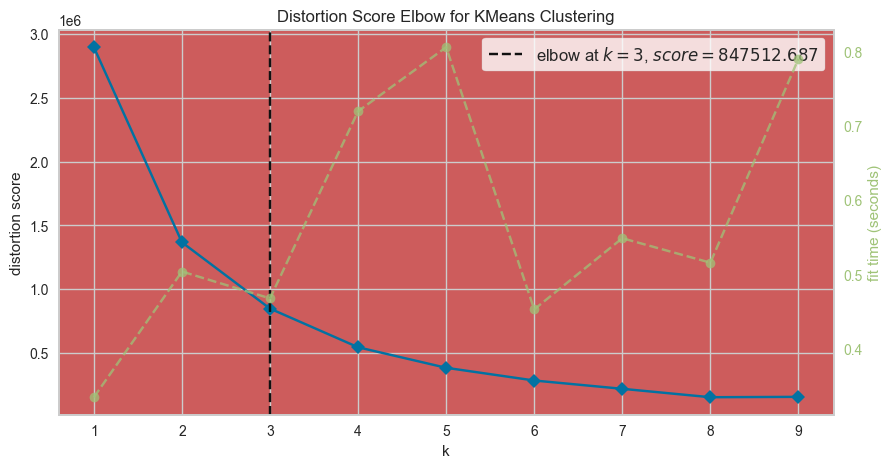

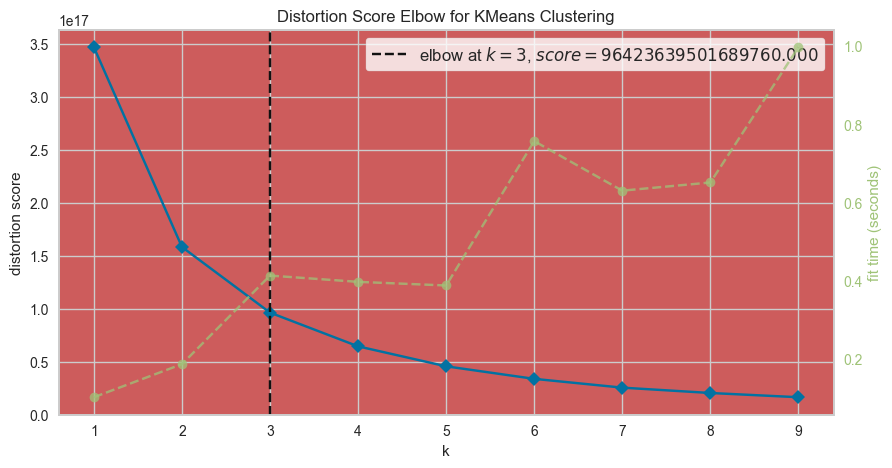

        CustomerID  Recency  Frequency   Monetary  Recency_Cluster  \
0                0     -373          1   411663.0                0   
1                1     -300          1   105503.0                0   
2                8     -174          1  1098496.0                1   
3               16     -107          1   286558.0                2   
4               18     -337          1   287492.0                0   
...            ...      ...        ...        ...              ...   
575731     2174059     -371          1   201270.0                0   
575732     2174065     -246          1   138943.0                1   
575733     2174072      -28          3   953618.0                2   
575734     2174075      -22          1   262489.0                2   
575735     2174083     -442          1   185271.0                0   

        Frequency_Cluster  Monetary_Cluster  
0                       0                 0  
1                       0                 0  
2                    

In [60]:
# Apply K-Means clustering to each metric and add cluster labels
rfm_df = find_optimal_k_and_cluster(rfm_df, 'Recency')
rfm_df = find_optimal_k_and_cluster(rfm_df, 'Frequency')
rfm_df = find_optimal_k_and_cluster(rfm_df, 'Monetary')

# Print the DataFrame with cluster columns
print(rfm_df)

In [61]:
rfm_df

,CustomerID,Recency,Frequency,Monetary,Recency_Cluster,Frequency_Cluster,Monetary_Cluster
0,0,-373,1,411663.0,0,0,0
1,1,-300,1,105503.0,0,0,0
2,8,-174,1,1098496.0,1,0,1
3,16,-107,1,286558.0,2,0,0
4,18,-337,1,287492.0,0,0,0
...,...,...,...,...,...,...,...
575731,2174059,-371,1,201270.0,0,0,0
575732,2174065,-246,1,138943.0,1,0,0
575733,2174072,-28,3,953618.0,2,0,0
575734,2174075,-22,1,262489.0,2,0,0


In [62]:
rfm_df['RFMScore'] = rfm_df.Recency_Cluster.map(str) + rfm_df.Frequency_Cluster.map(str) + rfm_df.Monetary_Cluster.map(str)
rfm_df

,CustomerID,Recency,Frequency,Monetary,Recency_Cluster,Frequency_Cluster,Monetary_Cluster,RFMScore
0,0,-373,1,411663.0,0,0,0,000
1,1,-300,1,105503.0,0,0,0,000
2,8,-174,1,1098496.0,1,0,1,101
3,16,-107,1,286558.0,2,0,0,200
4,18,-337,1,287492.0,0,0,0,000
...,...,...,...,...,...,...,...,...
575731,2174059,-371,1,201270.0,0,0,0,000
575732,2174065,-246,1,138943.0,1,0,0,100
575733,2174072,-28,3,953618.0,2,0,0,200
575734,2174075,-22,1,262489.0,2,0,0,200


In [63]:
rfm_df[rfm_df['RFMScore']=='232'].sort_values('Monetary', ascending=False).head(10)

,CustomerID,Recency,Frequency,Monetary,Recency_Cluster,Frequency_Cluster,Monetary_Cluster,RFMScore


In [64]:
rfm_df['RFMScore'].value_counts()

RFMScore
000    192396
100    170381
200    141098
211     27148
201      9083
111      7598
101      6955
210      6691
110      3387
001      3114
212      2231
222      2088
011      1095
221       955
010       837
112       240
202       138
102        79
122        75
121        67
012        23
002        21
220        17
120         9
022         6
021         3
020         1
Name: count, dtype: int64

In [65]:
#define categories for different RFM score combinations
def classify_rfm(score):
    if score =='222':
        return 'Best Customers'
    elif score in ['221','121']:
        return 'Loyal Customers'
    elif score in ['212','112','202','102','122','012','002','022']:
        return 'Big Spenders'
    elif score in ['211','201','111','021']:
        return 'Need Attention'
    elif score in ['101','001','011']:
        return 'Lost Customers'
    else:
        return 'Cheap Customers'

In [66]:
# Apply the function to classify the RFM scores
rfm_df['Customer_Type'] = rfm_df['RFMScore'].apply(classify_rfm)

In [67]:
print("Best Customers: ", len(rfm_df[rfm_df['Customer_Type']=='Best Customers']))
print('Loyal Customers: ',len(rfm_df[rfm_df['Customer_Type']=='Loyal Customers']))
print("Big Spenders: ",len(rfm_df[rfm_df['Customer_Type']=='Big Spenders']))
print('Need Attention: ', len(rfm_df[rfm_df['Customer_Type']=='Need Attention']))
print('Lost Customers: ',len(rfm_df[rfm_df['Customer_Type']=='Lost Customers']))
print('Cheap Customers: ',len(rfm_df[rfm_df['Customer_Type']=='Cheap Customers']))

Best Customers:  2088
Loyal Customers:  1022
Big Spenders:  2813
Need Attention:  43832
Lost Customers:  11164
Cheap Customers:  514817


In [68]:
merged_df = df.merge(rfm_df, on='CustomerID', how='left')
merged_df

,BillID,Channel,OrderFrom,TransactionDate,day,month,year,day_of_week,is_month_start,is_month_end,...,month_year,VoucherStatus_Yes,Recency,Frequency,Monetary,Recency_Cluster,Frequency_Cluster,Monetary_Cluster,RFMScore,Customer_Type
0,0,Take Away,CALL CENTER,2021-10-01,1,10,2021,4,1,0,...,202110,False,-329,3,1506161.0,0,0,1,001,Lost Customers
1,1,Take Away,STORE,2021-10-01,1,10,2021,4,1,0,...,202110,False,-340,3,1183064.0,0,0,1,001,Lost Customers
2,2,Take Away,WEBSITE,2021-10-01,1,10,2021,4,1,0,...,202110,False,-108,5,993004.0,2,1,0,210,Cheap Customers
3,3,Take Away,STORE,2021-10-01,1,10,2021,4,1,0,...,202110,False,-23,52,9923370.0,2,2,2,222,Best Customers
4,4,Delivery,STORE,2021-10-01,1,10,2021,4,1,0,...,202110,False,-70,16,4058641.0,2,2,2,222,Best Customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029062,1029062,Delivery,WEBSITE,2022-12-31,31,12,2022,5,0,1,...,202212,False,-1,3,939808.0,2,0,0,200,Cheap Customers
1029063,1029063,Take Away,CALL CENTER,2022-12-31,31,12,2022,5,0,1,...,202212,False,-1,5,2051266.0,2,1,1,211,Need Attention
1029064,1029064,Delivery,WEBSITE,2022-12-31,31,12,2022,5,0,1,...,202212,False,-1,1,115461.0,2,0,0,200,Cheap Customers
1029065,1029065,Take Away,STORE,2022-12-31,31,12,2022,5,0,1,...,202212,False,-1,3,754072.0,2,0,0,200,Cheap Customers


In [69]:
rfm_df.to_csv('rfm_pizza_hut.csv', index=False)

## 4.3 Clustering Evaluation


- In this projects, i am trying to do customer segmentation using RFM Analysis. In analyzing the RFM value i am using  K-Means Clustering method. From this way, I get 6 different group or clusters which is :

+ Best Customers (592) : Bought most recently and most often, and spend the most
+ Loyal Customers (123) : Buy most frequently
+ Big Spenders (4159) : Spend the most
+ Almost Lost (28597) : Haven’t purchased for some time, but purchased frequently and spend the most
+ Lost Customers (129) : Haven’t purchased for some time, but purchased frequently and spend the most
+ Lost Cheap Customers (8172) : Last purchased long ago, purchased few, and spent little

From this six clusters, we can give a data-driven Business Insights as follows :

1. For Best Customers, we shouldn't give any price incentives. Instead, we can offer some new products, and loyalty programs.
2. For Loyal Customers, we can offer some new products and try to give a price incentives on expensive products.
3. For Big Spenders, we can market our most expensive products on this kind of customers
4. For Almost Lost and Lost Customers, we should give an aggresive Price Incentive
5. For Lost Cheap Customers, we shouldn't spend too much resources on trying to re-acquire this segment

## 4.4 Cluster Exploration

In this cluster exploration, i am going to cover business question below : using pbi

1. How many Customer for each group/cluster?
2. How does each cluster/group contribute to the company's revenue?
3. What is the common stock ordered in each group?
4. When does each cluster usually made an order?
5. How does each cluster react on a discounts?

### 1. How many Customer for each group/cluster?
"It can be observed that most of Pizza Hut's customers are casual customers with low loyalty. This may be due to customers being reluctant to register as members."
2. How does each cluster/group contribute to the company's revenue?
30.57% of the total revenue. Conversely, the 'Other' group, which represents 92% of the customer base, contributes only 26% of the revenue. The 'Best Customers' and 'Big Spenders' groups also generate significant revenue for the chain
30.57% of the total revenue. Conversely, the 'Other' group, which represents 92% of the customer base, contributes only 26% of the revenue. The 'Best Customers' and 'Big Spenders' groups also generate significant revenue for the chain

3. What is the common ordered from  in each group?
Most customers prefer delivery or takeout. Among them, the groups with the highest percentage of customers dining in-store are 'Best Customers' (9.42%) and 'Big Spenders' (7.57%)."
Except for the 'Lost Customers' group, it can be observed that customers who dine in at the restaurant tend to spend more compared to those who choose delivery or takeout. This could be due to several reasons: In-Store Experience: Dining in provides a more engaging and enjoyable experience, which might encourage customers to order additional items or choose more expensive options.People who go out to eat are in a more relaxed and social mindset, leading them to spend more money. When dining out, individuals often treat themselves and enjoy the experience more, which can result in higher spending."
4. When does each cluster usually made an order?
"Ordering from the store is the most popular method. Among these, the 'Loyal Customers' group, which orders frequently, has the highest rate of in-store orders (72.28%). Therefore, it is essential to improve customer service through the store to increase the rate of repeat orders.
5. How does each cluster react on a discounts?
"The proportion of customers using vouchers is still low, below 15%. The groups that use vouchers the most are 'Almost Lost' (13.44%) and 'Big Spenders' (12.39%), corresponding to approximately 18% of these groups ordering via the app."
"The 'Almost Lost' casual customers respond well to promotional programs. We can see that revenue from these groups increases significantly on promotion days like the 20th and 25th. However, the program does not seem to be particularly attractive to potential groups such as 'Best Customers', 'Big Spenders', and 'Loyal Customers'."



